# Table of Contents

* [Introduction](#Introduction)
* [Meta-data](#Meta-data)
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
    * [Importing libraries](#Importing_libraries)
    * [Descriptive Statistics](#Descriptive_Statistics)
    * [Missing value imputation](#Missing_value_imputation)
    * [Graphical representation](#Graphical_representation)
    * [End Notes](#End_Notes)

## Introduction <a class="anchor" id="Introduction"></a>

Vous êtes développeur AI dans une startup de la Silicon Valley qui fournit des services dans le domaine de l'investissement immobilier.
Les chargés de relation client ont mentionné que la demande a augmenté récemment et qu'il devient difficile de faire des estimations personnalisées.
De ce fait, l'entreprise vous a confier d'automatiser cette tâche avec un modèle prédictif.
Pour cela, vous avez récupéré une base de données qui contient les prix médians des logements pour les districts de Californie issus du recensement de 1990

## Metadata <a class="anchor" id="Meta-data"></a>

`longitude`
`latitude`
`housingMedianAge` | Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
`totalRooms` | Nombre total de chambres dans un bloc
`totalBedrooms` |  Nombre total de chambres de lit dans un bloc
`population` Nombre total de personnes résidant dans un bloc
`households`| Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
`medianIncome` | Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
`medianHouseValue` | Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
`oceanProximity` | Situation de la maison par rapport à la mer

## Exploratory Data Analysis

EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading data

In [6]:
df = pd.read_csv('../data/data_raw.csv')
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [16]:
#droping 'Unnamed: 0' column
df_fltd = df.drop(['Unnamed: 0'], axis=1)

### Descriptive Statistics

In [17]:
df_fltd.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7312
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453,NaN
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661,NaN
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,NaN
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000,NaN
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000,NaN
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000,NaN


In [28]:
df_fltd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


### Missing value Interpolation

In [18]:
df_fltd.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We have 176 total_bedrooms feauture rows which are null, so we could either drop those rows with no such an impact since they represent only 1% of dataset's instances or replacing them by performing a linear interpolation.

In this case we'll try an interpolation.

In [23]:
df_fltd= df_fltd.interpolate()
df_fltd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [22]:
#checking if missing values column rows have been dropped
df_fltd.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data Distribution

In [30]:
#Is the data skewed to one side?
for i in df_fltd.columns:
    i.skew()

AttributeError: 'str' object has no attribute 'skew'

### Outlier/s treatment

#### Box Plot

<AxesSubplot:>

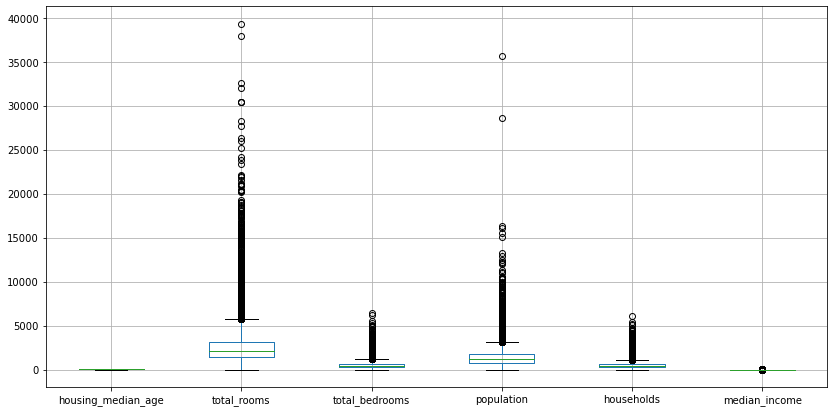

In [24]:
df_fltd.iloc[:, 2:8].boxplot(figsize=(14,7))

#### Z Score method

In [27]:
#If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points.
#Such data instances could be an outlier



array([0.35736844, 0.27651489, 0.79912694, ..., 0.05111869, 0.05954679,
       0.2223114 ])

### End Notes